<a href="https://colab.research.google.com/github/shrayan005/Machine_learning/blob/main/Movies_boxoffice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/mcu_box_office.csv")

# See first few rows
df.head()


,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


In [5]:
df.isnull().sum()

,0
movie_title,0
mcu_phase,0
release_date,0
tomato_meter,0
audience_score,0
movie_duration,0
production_budget,0
opening_weekend,0
domestic_box_office,0
worldwide_box_office,0


In [6]:
df = df.drop(['movie_title', 'release_date'], axis=1)


In [7]:
money_cols = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']

for col in money_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True)  # remove $ and ,
    df[col] = pd.to_numeric(df[col], errors='coerce')   # convert to numeric


In [8]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   mcu_phase             27 non-null     int64
 1   tomato_meter          27 non-null     int64
 2   audience_score        27 non-null     int64
 3   movie_duration        27 non-null     int64
 4   production_budget     27 non-null     int64
 5   opening_weekend       27 non-null     int64
 6   domestic_box_office   27 non-null     int64
 7   worldwide_box_office  27 non-null     int64
dtypes: int64(8)
memory usage: 1.8 KB


,mcu_phase,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,1,94,91,126,186000000,102118668,318604126,585171547
1,1,67,70,112,137500000,55414050,134806913,265573859
2,1,72,71,124,170000000,128122480,312433331,621156389
3,1,77,76,113,150000000,65723338,181030624,449326618
4,1,79,75,124,140000000,65058524,176654505,370569776


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('worldwide_box_office', axis=1)  # features
y = df['worldwide_box_office']               # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 3.943135311545574e+16
R² Score: 0.9389261340238312


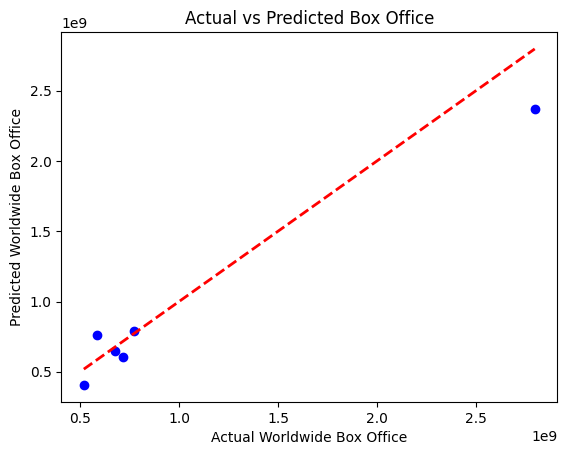

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # perfect prediction line
plt.xlabel('Actual Worldwide Box Office')
plt.ylabel('Predicted Worldwide Box Office')
plt.title('Actual vs Predicted Box Office')
plt.show()
